In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

address = 'D:/HomeWork/Machine Learning/ML-HW01/ML-HW01/dataset2/saved_file.xlsx'

df = pd.read_excel(address)
data = df.sample(frac=1)
data.head(5)

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
212,101,2015,8.2,8,6740000,8000000.0,34.0,1,15,4032265,18398,302,1298,2.208000e+03
230,173,2015,4.4,15,22600000,100000.0,2720.0,1,-5,659772,2841,431,606,2.538489e+06
35,46,2014,5.8,2,38900000,13000000.0,3230.0,1,0,1488038,2571,553,643,8.858600e+04
165,55,2015,7.4,1,350000000,190000000.0,4004.0,7,-17,59056,330,8,39,1.189000e+07
12,15,2014,5.4,15,84300000,6500000.0,3185.0,1,0,19032902,38810,4382,4392,1.942010e+07


In [2]:
# extract Y and drop from data frame
y = data.iloc[:, 2].values
data = data.drop(['Ratings'] , axis=1)

In [3]:
#Prepare the data
# #convert labels to numbers
newMovie = pd.Series(data['Movie']).astype('category').cat.codes.values
data['Movie'] = newMovie

#with P-value decide to drop this feature
data = data.drop(['Comments'] , axis=1)

#GET X
X = data.iloc[:, :].values

#Normalise X so the values lie between -1 and 1.
mu = X.mean(0) 
sigma = X.std(0) # standard deviation: max(x)-min(x)
xn = (X - mu) / sigma
m,n = X.shape

#Add column of ones
X = np.hstack((np.ones((m, 1)), xn))

In [4]:
def cost_function_MSE(X, Y, theta):
    m = len(Y)
    J = np.sum((X.dot(theta)-Y) ** 2)/(2 * m)
    return J

In [5]:
def gradient_descent(X, Y , Theta , alpha , iterations , xTest , yTest ):
    cost_history = [0] * iterations
    test_cost_history = [0] * iterations
    step_history = [0] * iterations
    m = len(Y)
 
    for iteration in range(iterations):
 # Hypothesis Values
        h = X.dot(Theta)
    
 # Difference b/w Hypothesis and Actual Y
        loss = h - Y
    
 # Gradient Calculation
        gradient = X.T.dot(loss) / m
    
 # Changing Values of B using Gradient
        Theta = Theta - alpha * gradient
        step_history[iteration] = alpha * gradient
        alpha = alpha - 0.00001
    
 # New Cost Value
        cost = cost_function_MSE(X, Y, Theta)
        cost_history[iteration] = cost
        test_cost_history[iteration] = cost_function_MSE(xTest, yTest, Theta)
        step_history[iteration] = alpha * gradient
        
 
    return Theta, cost_history , test_cost_history , step_history

In [6]:
#60% of data for train 139
#40% of data for test 92
#all data is 231
m = 139

X_train = X[:m]
y_train = y[:m]

X_test = X[m:]
y_test = y[m:]

In [7]:
# Initial Coefficients
Theta = np.zeros(X_train.shape[1])

alpha = 0.02
iter_ = 1000

newTheta, cost_history , test_cost_history , step_history = gradient_descent(X_train, y_train, Theta, alpha, iter_ , X_test ,y_test)

print(newTheta)

[ 6.32808902  0.00825728  0.03270587  0.01460846  0.25876666  0.33538014
 -0.23918715 -0.09735368  0.13078766  0.45956258  0.14294492 -0.82839531
 -0.02783386]


In [8]:
y_pred = np.matmul(X_train, newTheta)

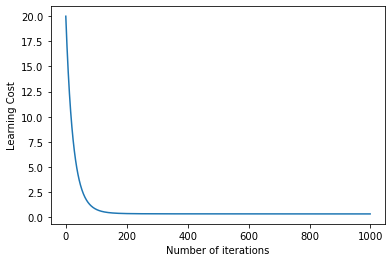

In [9]:
# Plot the convergence graph for learning cost
plt.plot(np.arange(iter_), cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Learning Cost')
plt.show()

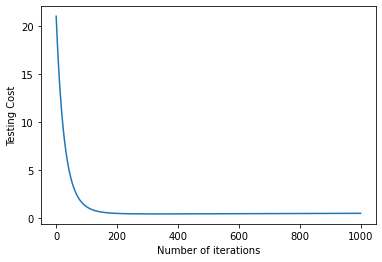

In [10]:
# Plot the convergence graph for testing cost
plt.plot(np.arange(iter_), test_cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Testing Cost')
plt.show()

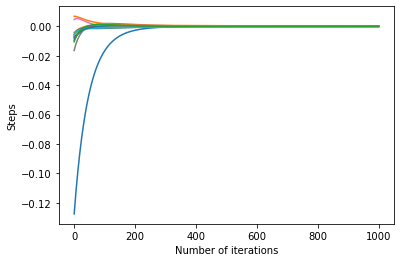

In [11]:
# Plot the convergence graph for thetas Step
plt.plot(np.arange(iter_), step_history)
plt.xlabel('Number of iterations')
plt.ylabel('Steps')
plt.show()

In [12]:
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(abs(r2))

In [13]:
r2(y_pred , y_train)

0.3689924559597474

In [14]:
cost_function_MSE(X_train , y_train , newTheta)

0.3216466325842033